In [2]:
import os
import pickle
import numpy as np
import matplotlib.pyplot as plt

In [14]:
with open('./results/parallel_TD3_cSim_condense_large_infi_1_step.pkl', 'rb') as f:
    steps = pickle.load(f)
with open('./results/parallel_TD3_cSim_condense_large_infi_1_eval.pkl', 'rb') as f:
    evals = pickle.load(f)

In [15]:
max(steps)

-11.20940579999981

In [19]:
len(evals)

9

In [16]:
log_avg_eval = -np.log(np.abs(np.array(evals))/10)
if max(steps) < -6:
    steps = -np.log(np.abs(np.array(steps)))

In [20]:
runing_averge = []
curr = 0
beta = 1-0.02
for i in range(len(steps)):
    curr = beta*curr + (1-beta)*steps[i]
    correction = 1 - (beta**(i+1))
    runing_averge.append(curr / correction)

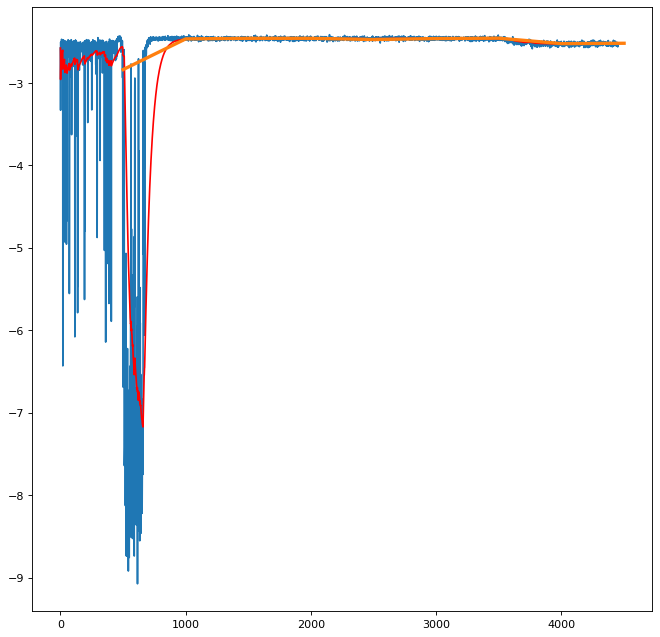

In [24]:
plt.figure(figsize=(10, 10), dpi=80)
plt.plot(range(len(steps)), steps)
plt.plot(range(len(steps)), runing_averge, c='r')
plt.plot(range(500, 5000, 500), log_avg_eval, linewidth=3)
# plt.plot([500,1000,1500,2000,2500,3000,3500,4000,4500,5000],np.array(-np.log([800,1400,4300,3500,3000,2500,2000,1300,600,15])), '-o')
plt.show()

Condense Representation

In [115]:
with open('./results/parallel_TD3_cSim_condense_0_step.pkl', 'rb') as f:
    con_steps = pickle.load(f)

In [116]:
max(con_steps)

-16.154005000000154

In [125]:
log_step_con = np.array(-np.log(np.abs(con_steps[:3000])))

In [130]:
runing_averge_con = []
curr = 0
beta = 1-0.04
for i in range(len(log_step_con)):
    curr = beta*curr + (1-beta)*log_step_con[i]
    correction = 1 - (beta**(i+1))
    runing_averge_con.append(curr / correction)

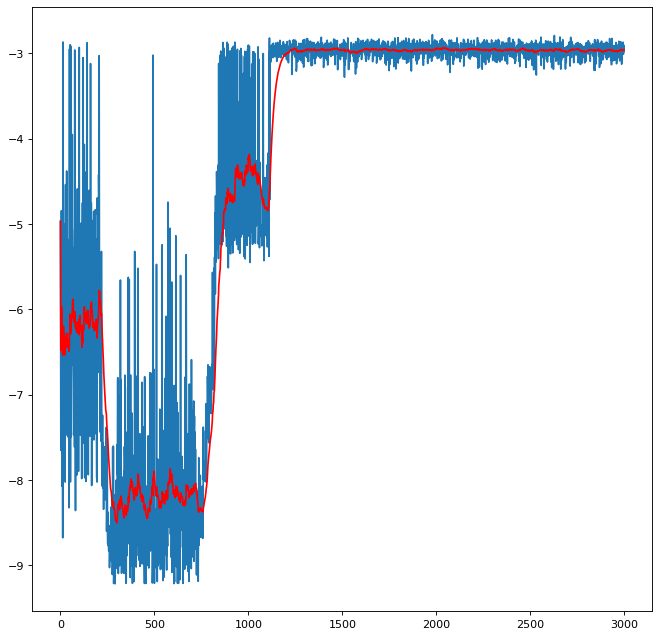

In [131]:
plt.figure(figsize=(10, 10), dpi=80)
plt.plot(range(len(log_step_con)), log_step_con)
plt.plot(range(len(log_step_con)), runing_averge_con, c='r')
plt.show()